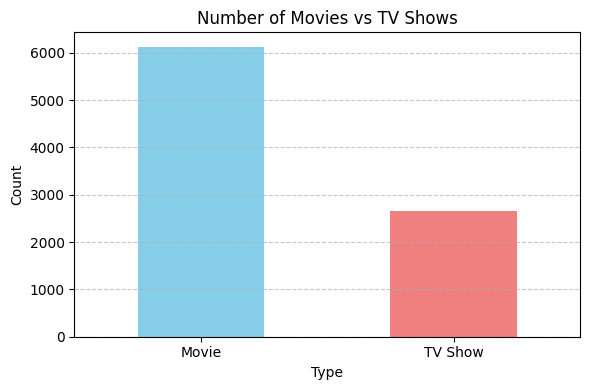

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/archive.zip')

plt.figure(figsize=(6, 4))
df['type'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Number of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


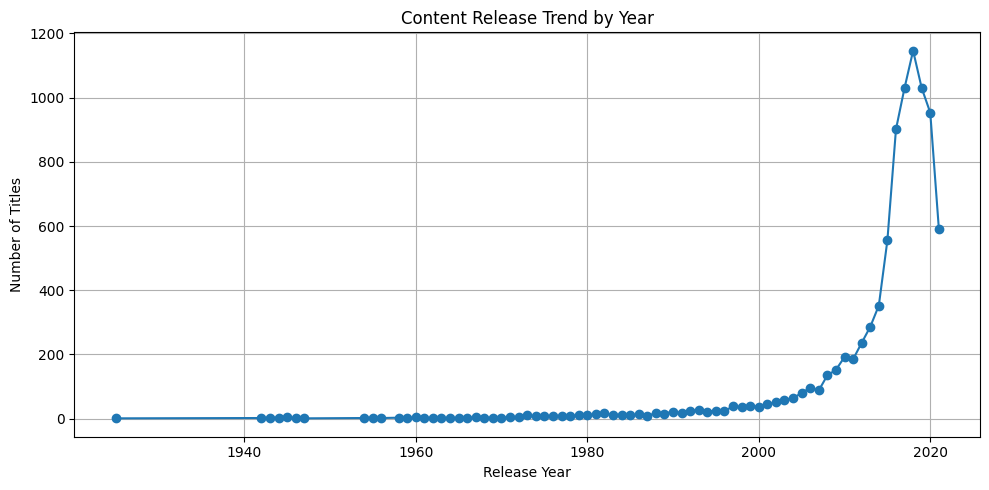

In [ ]:
plt.figure(figsize=(10, 5))
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Content Release Trend by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.tight_layout()
plt.show()


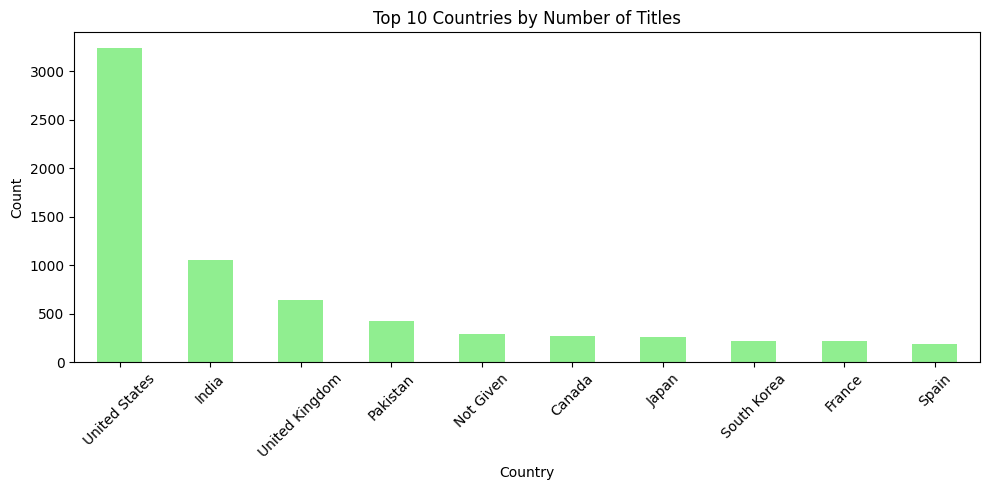

In [ ]:
plt.figure(figsize=(10, 5))
df['country'].value_counts().head(10).plot(kind='bar', color='lightgreen')
plt.title('Top 10 Countries by Number of Titles')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


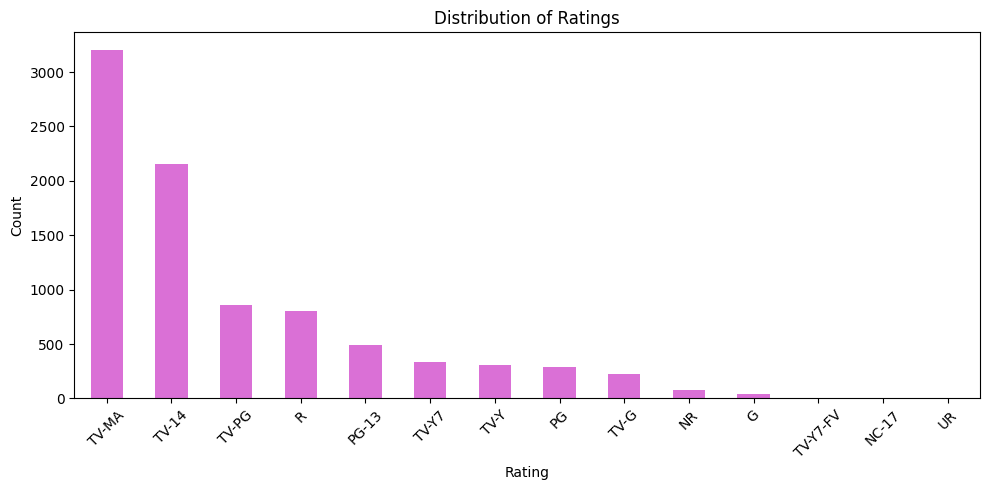

In [ ]:
plt.figure(figsize=(10, 5))
df['rating'].value_counts().plot(kind='bar', color='orchid')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


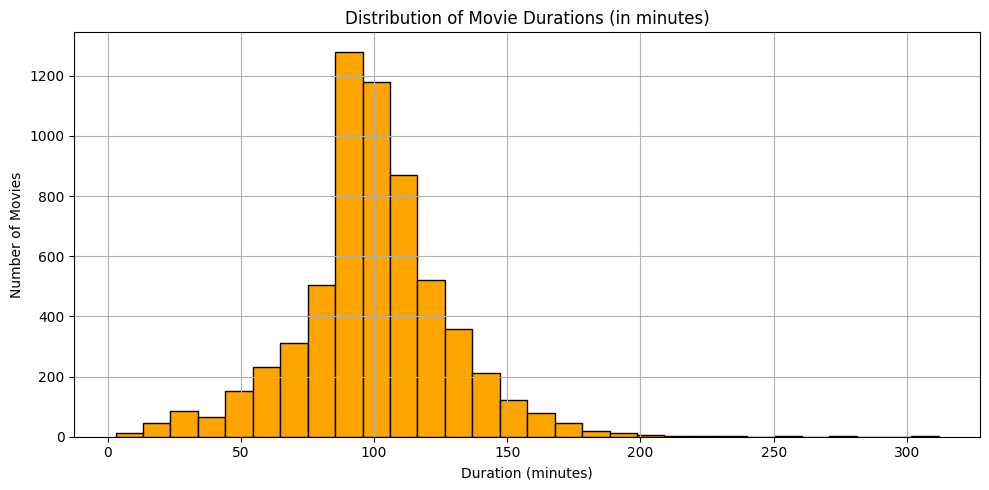

In [ ]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_mins'] = movie_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 5))
plt.hist(movie_df['duration_mins'].dropna(), bins=30, color='orange', edgecolor='black')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()


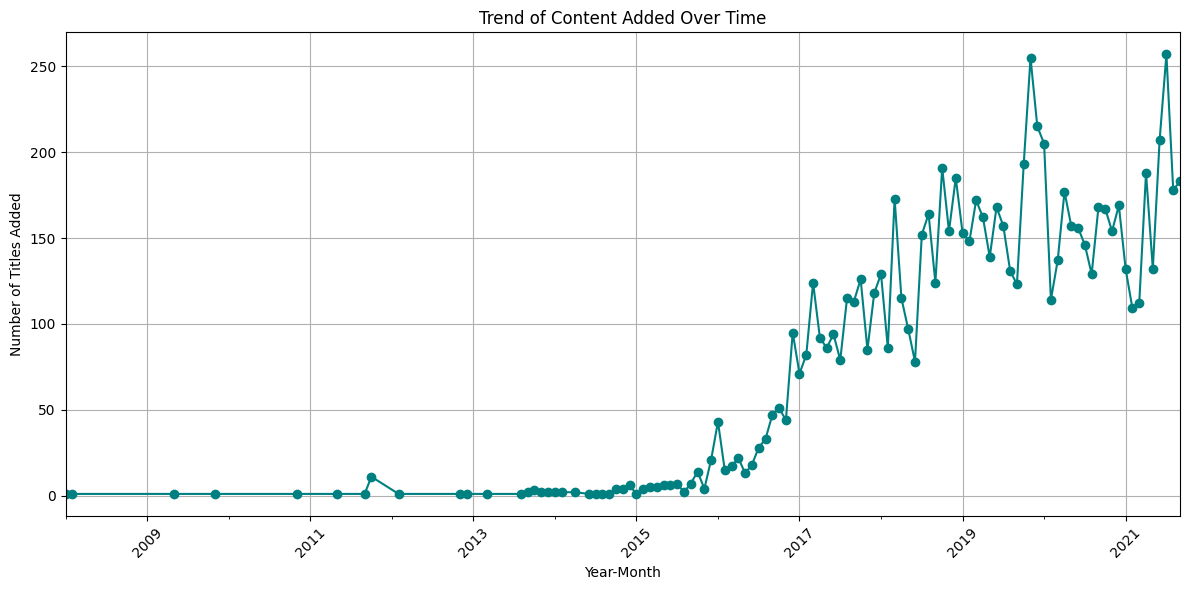

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_month'] = df['date_added'].dt.to_period('M')

plt.figure(figsize=(12, 6))
df['year_month'].value_counts().sort_index().plot(kind='line', marker='o', color='teal')
plt.title('Trend of Content Added Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


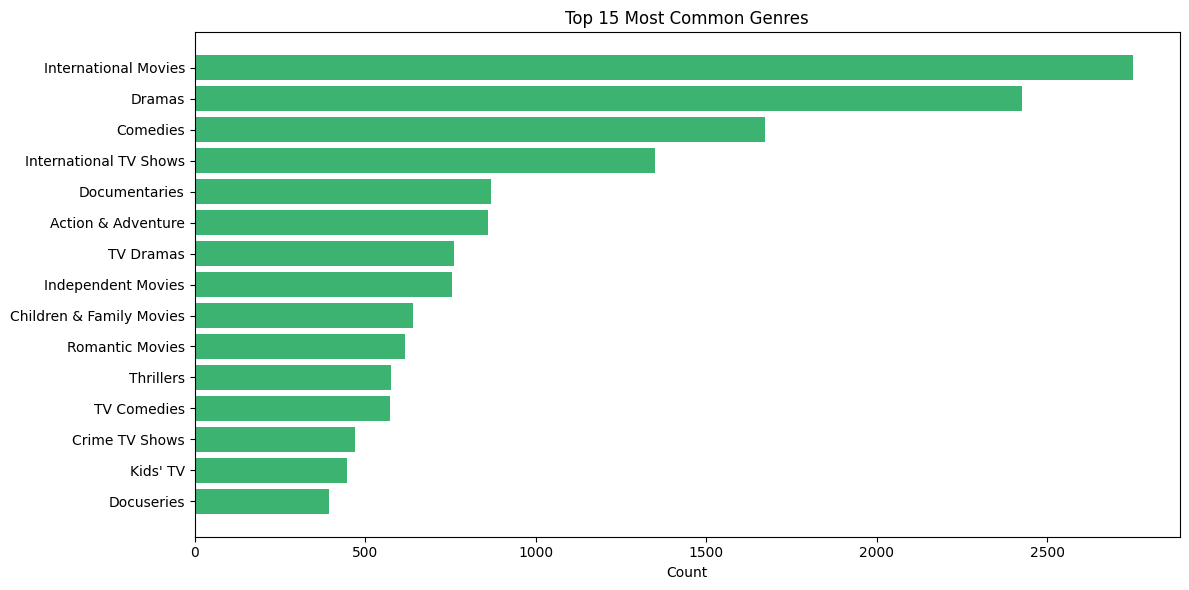

In [ ]:
from collections import Counter

# Split genres and count them
genre_counter = Counter()
df['listed_in'].dropna().apply(lambda x: genre_counter.update(x.split(', ')))

# Plot top 15 genres
genres, counts = zip(*genre_counter.most_common(15))
plt.figure(figsize=(12, 6))
plt.barh(genres[::-1], counts[::-1], color='mediumseagreen')
plt.title('Top 15 Most Common Genres')
plt.xlabel('Count')
plt.tight_layout()
plt.show()


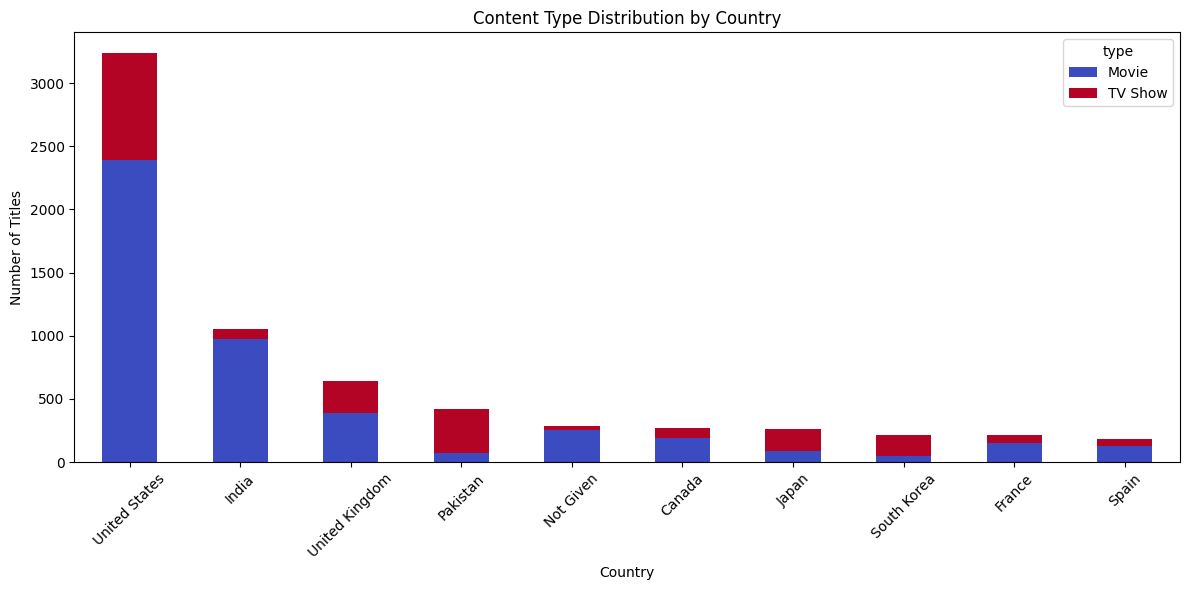

In [ ]:
# Group by country and type
country_type_df = df.groupby(['country', 'type']).size().unstack().fillna(0)
top_countries = df['country'].value_counts().head(10).index
top_country_data = country_type_df.loc[top_countries]

top_country_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.title('Content Type Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


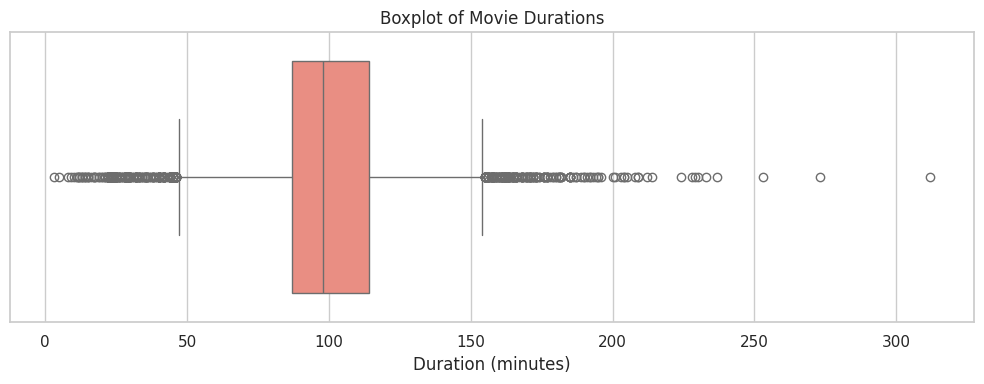

In [ ]:
import seaborn as sns

# Ensure seaborn style
sns.set(style='whitegrid')

# Movie durations only
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_mins'] = pd.to_numeric(movie_df['duration'].str.extract('(\d+)')[0], errors='coerce')

plt.figure(figsize=(10, 4))
sns.boxplot(x=movie_df['duration_mins'], color='salmon')
plt.title('Boxplot of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.tight_layout()
plt.show()


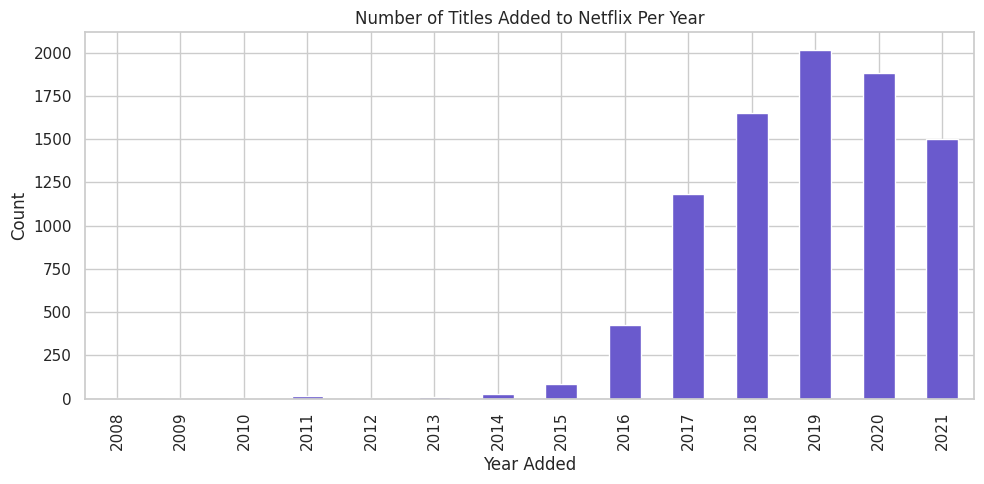

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

plt.figure(figsize=(10, 5))
df['year_added'].value_counts().sort_index().plot(kind='bar', color='slateblue')
plt.title('Number of Titles Added to Netflix Per Year')
plt.xlabel('Year Added')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



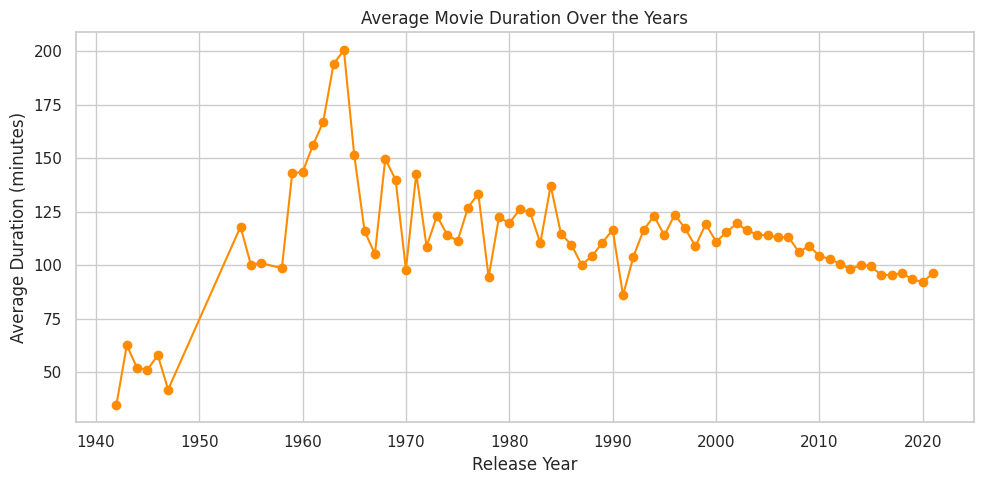

In [ ]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_mins'] = movie_df['duration'].str.extract('(\d+)').astype(float)

avg_duration = movie_df.groupby('release_year')['duration_mins'].mean()

plt.figure(figsize=(10, 5))
avg_duration.plot(marker='o', linestyle='-', color='darkorange')
plt.title('Average Movie Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()


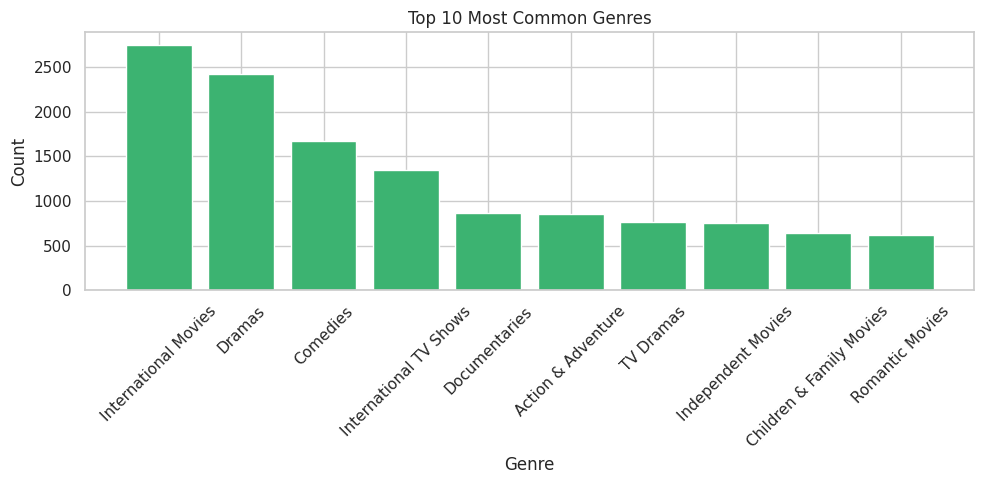

In [ ]:
from collections import Counter

# Flatten genre lists
genre_list = df['listed_in'].dropna().str.split(', ').sum()
genre_counts = Counter(genre_list).most_common(10)

# Unpack for plotting
genres, counts = zip(*genre_counts)

plt.figure(figsize=(10, 5))
plt.bar(genres, counts, color='mediumseagreen')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


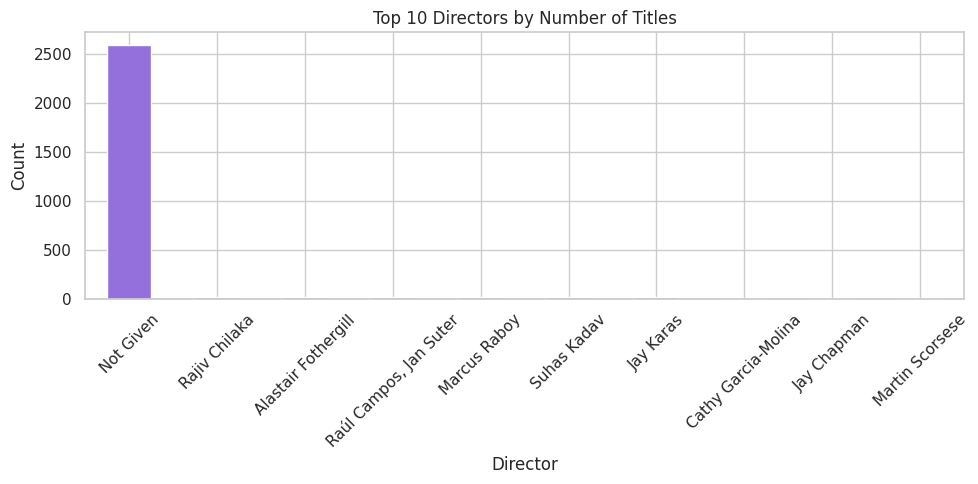

In [ ]:
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_directors.plot(kind='bar', color='mediumpurple')
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Director')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


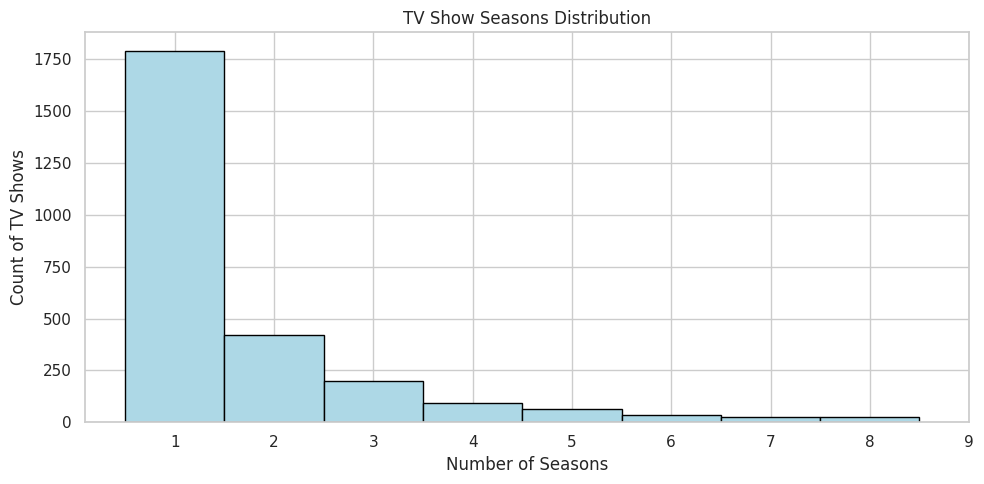

In [ ]:
tv_df = df[df['type'] == 'TV Show'].copy()
tv_df['seasons'] = tv_df['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(10, 5))
plt.hist(tv_df['seasons'].dropna(), bins=range(1, 10), color='lightblue', edgecolor='black', align='left')
plt.title('TV Show Seasons Distribution')
plt.xlabel('Number of Seasons')
plt.ylabel('Count of TV Shows')
plt.xticks(range(1, 10))
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

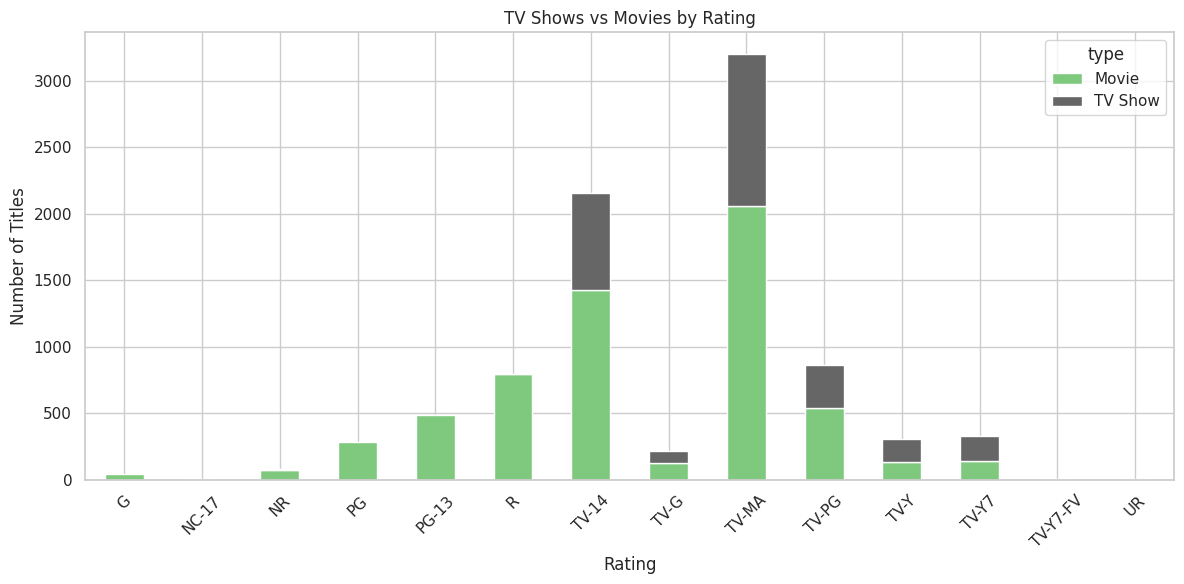

In [ ]:
plt.figure(figsize=(12, 6))
pd.crosstab(df['rating'], df['type']).plot(kind='bar', stacked=True, colormap='Accent', figsize=(12, 6))
plt.title('TV Shows vs Movies by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


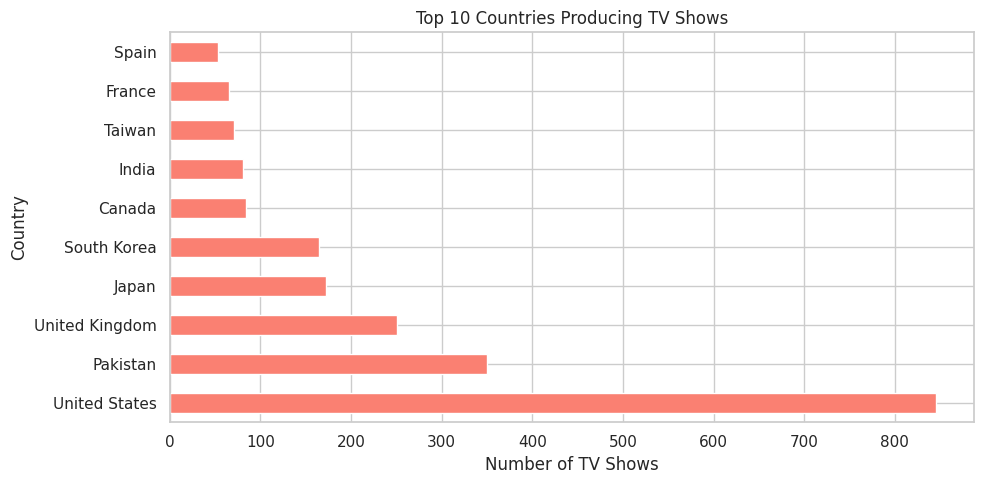

In [ ]:
tv_shows = df[df['type'] == 'TV Show']
top_tv_countries = tv_shows['country'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_tv_countries.plot(kind='barh', color='salmon')
plt.title('Top 10 Countries Producing TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


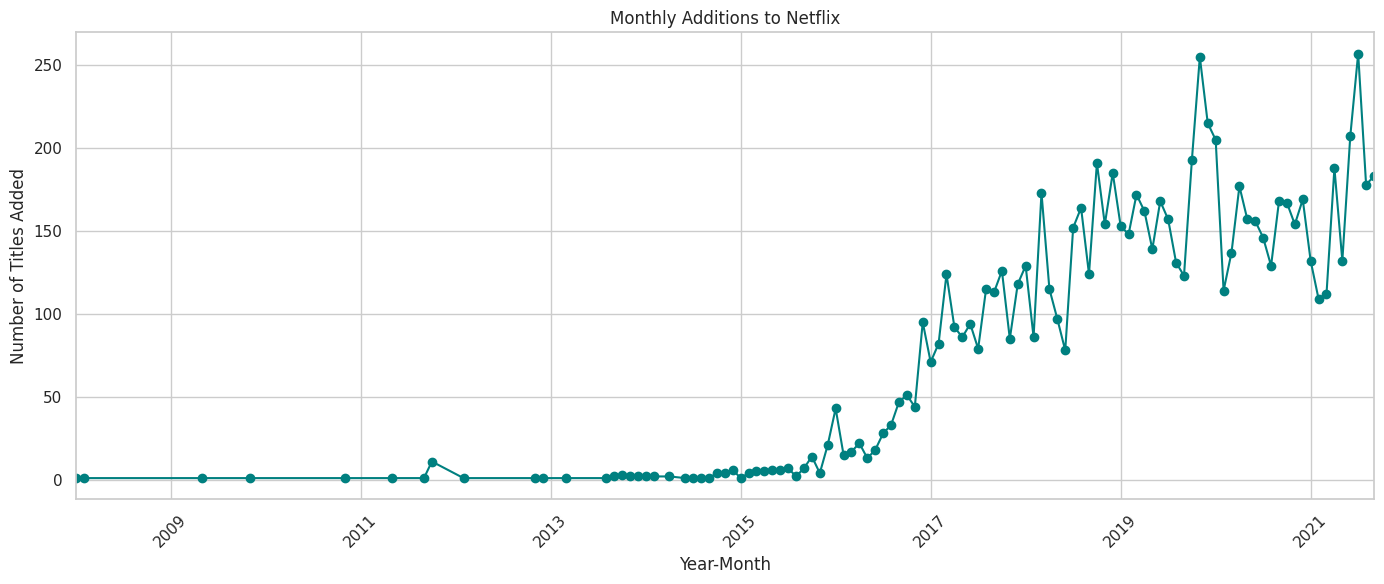

In [ ]:
df['year_month'] = df['date_added'].dt.to_period('M')
monthly_counts = df['year_month'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
monthly_counts.plot(kind='line', marker='o', color='teal')
plt.title('Monthly Additions to Netflix')
plt.xlabel('Year-Month')
plt.ylabel('Number of Titles Added')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


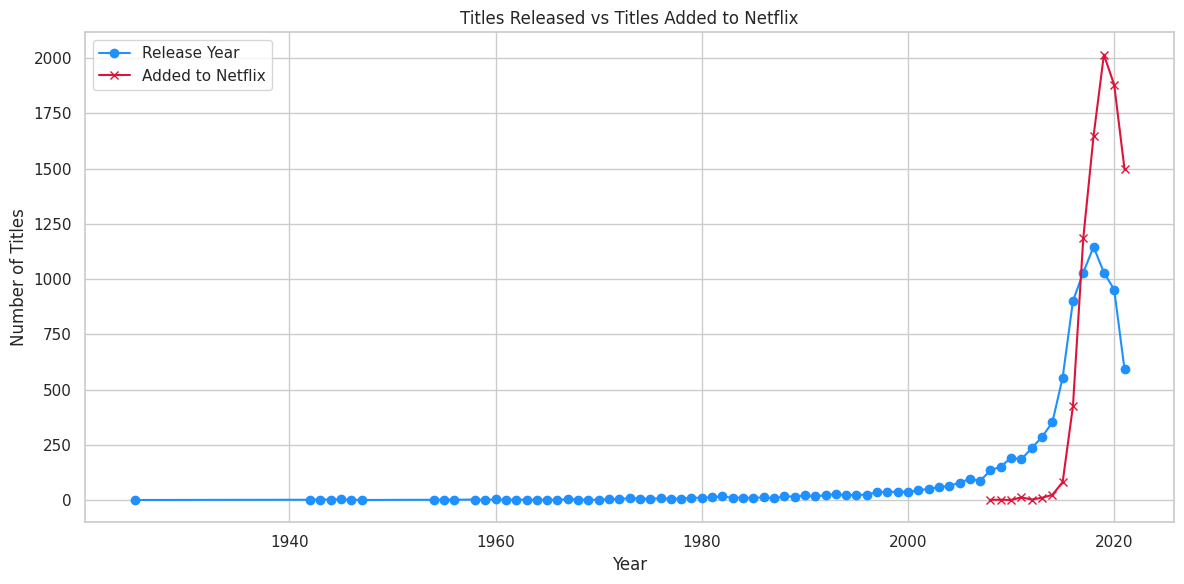

In [ ]:
# Ensure dates are in datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create year columns
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
df['added_year'] = df['date_added'].dt.year

# Group and compare
release_counts = df['release_year'].value_counts().sort_index()
added_counts = df['added_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.plot(release_counts.index, release_counts.values, label='Release Year', color='dodgerblue', marker='o')
plt.plot(added_counts.index, added_counts.values, label='Added to Netflix', color='crimson', marker='x')
plt.title('Titles Released vs Titles Added to Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


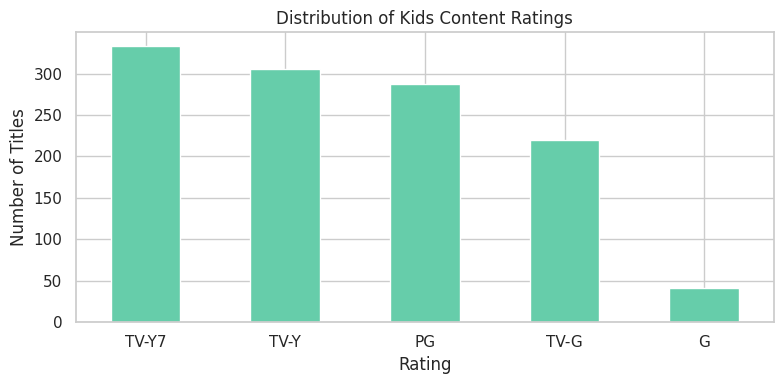

In [ ]:
kids_ratings = ['TV-Y', 'TV-Y7', 'TV-G', 'G', 'PG']

plt.figure(figsize=(8, 4))
df[df['rating'].isin(kids_ratings)]['rating'].value_counts().plot(kind='bar', color='mediumaquamarine')
plt.title('Distribution of Kids Content Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


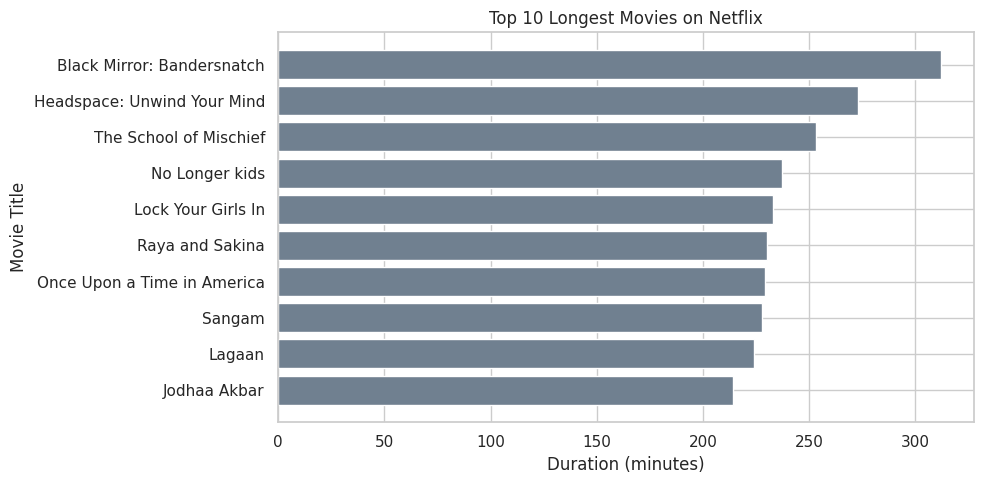

In [ ]:
movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_mins'] = movie_df['duration'].str.extract('(\d+)').astype(float)

top_longest = movie_df[['title', 'duration_mins']].dropna().sort_values(by='duration_mins', ascending=False).head(10)

plt.figure(figsize=(10, 5))
plt.barh(top_longest['title'][::-1], top_longest['duration_mins'][::-1], color='slategray')
plt.title('Top 10 Longest Movies on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Movie Title')
plt.tight_layout()
plt.show()
